In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
def show_image(image, cmap="gray"):
    plt.imshow(image, cmap)
    plt.show()

In [3]:
image = plt.imread('../data/cars.png')

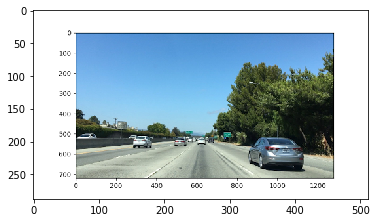

In [4]:
plt.imshow(image)
plt.show()

In [5]:
image = plt.imread('../data/cutout1.jpg')

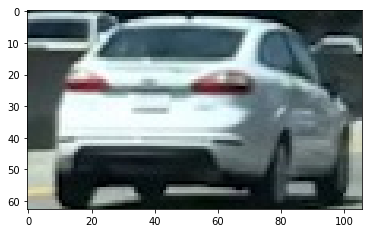

In [6]:
plt.imshow(image)
plt.show()

In [7]:
import numpy as np

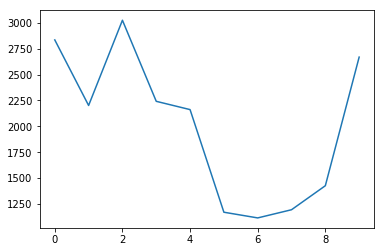

In [8]:
plt.plot(np.histogram(image)[0])
plt.show()

In [9]:
rhist = np.histogram(image[:,:,0], bins=32, range=(0,255))
ghist = np.histogram(image[:,:,1], bins=32, range=(0,255))
bhist = np.histogram(image[:,:,2], bins=32, range=(0,255))

In [10]:
bin_edges = rhist[1]

In [11]:
bin_edges

array([   0.     ,    7.96875,   15.9375 ,   23.90625,   31.875  ,
         39.84375,   47.8125 ,   55.78125,   63.75   ,   71.71875,
         79.6875 ,   87.65625,   95.625  ,  103.59375,  111.5625 ,
        119.53125,  127.5    ,  135.46875,  143.4375 ,  151.40625,
        159.375  ,  167.34375,  175.3125 ,  183.28125,  191.25   ,
        199.21875,  207.1875 ,  215.15625,  223.125  ,  231.09375,
        239.0625 ,  247.03125,  255.     ])

In [12]:
bin_edges[1:]

array([   7.96875,   15.9375 ,   23.90625,   31.875  ,   39.84375,
         47.8125 ,   55.78125,   63.75   ,   71.71875,   79.6875 ,
         87.65625,   95.625  ,  103.59375,  111.5625 ,  119.53125,
        127.5    ,  135.46875,  143.4375 ,  151.40625,  159.375  ,
        167.34375,  175.3125 ,  183.28125,  191.25   ,  199.21875,
        207.1875 ,  215.15625,  223.125  ,  231.09375,  239.0625 ,
        247.03125,  255.     ])

In [13]:
bin_edges[0:len(bin_edges)-1]

array([   0.     ,    7.96875,   15.9375 ,   23.90625,   31.875  ,
         39.84375,   47.8125 ,   55.78125,   63.75   ,   71.71875,
         79.6875 ,   87.65625,   95.625  ,  103.59375,  111.5625 ,
        119.53125,  127.5    ,  135.46875,  143.4375 ,  151.40625,
        159.375  ,  167.34375,  175.3125 ,  183.28125,  191.25   ,
        199.21875,  207.1875 ,  215.15625,  223.125  ,  231.09375,
        239.0625 ,  247.03125])

In [14]:
(bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2

array([   3.984375,   11.953125,   19.921875,   27.890625,   35.859375,
         43.828125,   51.796875,   59.765625,   67.734375,   75.703125,
         83.671875,   91.640625,   99.609375,  107.578125,  115.546875,
        123.515625,  131.484375,  139.453125,  147.421875,  155.390625,
        163.359375,  171.328125,  179.296875,  187.265625,  195.234375,
        203.203125,  211.171875,  219.140625,  227.109375,  235.078125,
        243.046875,  251.015625])

In [15]:
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

In [16]:
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')

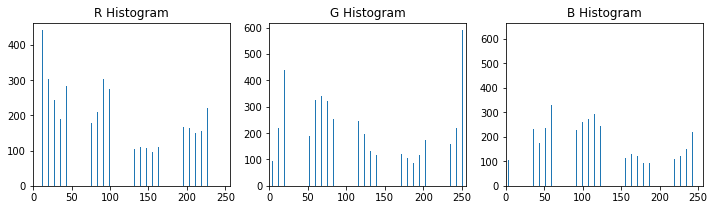

In [17]:
plt.show()

In [18]:
# Create histogram features
# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(image[:,:,0], bins=32, range=(0,255))
    ghist = np.histogram(image[:,:,1], bins=32, range=(0,255))
    bhist = np.histogram(image[:,:,2], bins=32, range=(0,255))
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return rhist, ghist, bhist, bin_centers, hist_features
    
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256))

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

In [20]:
def plot_3d_image(img):
    # Select a small fraction of pixels to plot by subsampling it
    scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

    # Convert subsampled image to desired color space(s)
    img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
    img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
    img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting
    
    plt.imshow(img_small_RGB)
    plt.show()
    
    # Plot and show
    plot3d(img_small_RGB, img_small_rgb)
    plt.show()

    plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
    plt.show()

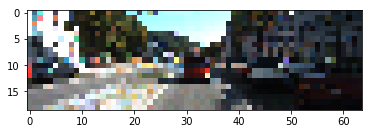

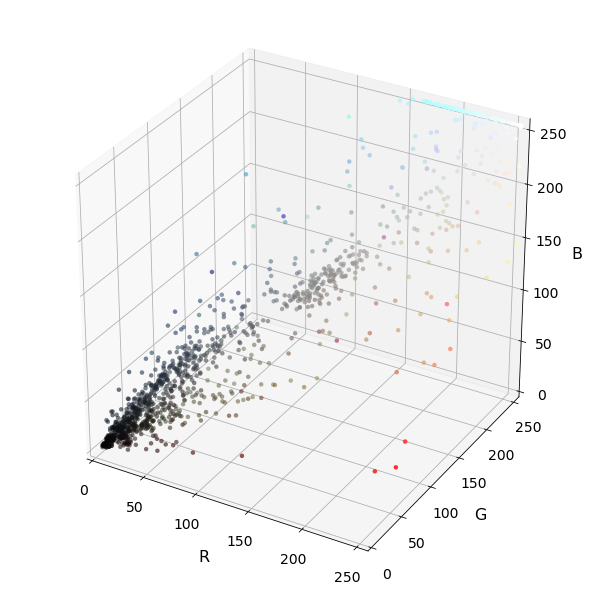

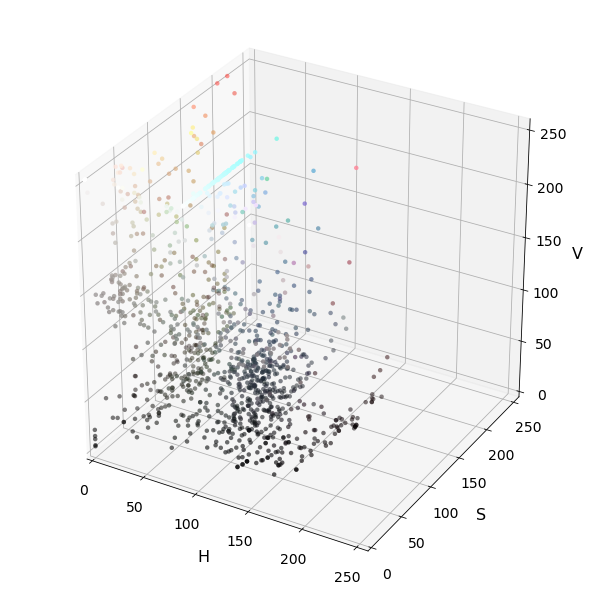

In [21]:
# Read a color image
img = cv2.imread("../data/000275.png")
plot_3d_image(img)

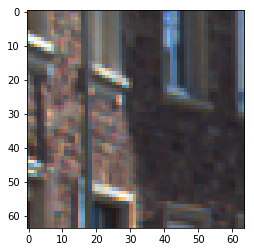

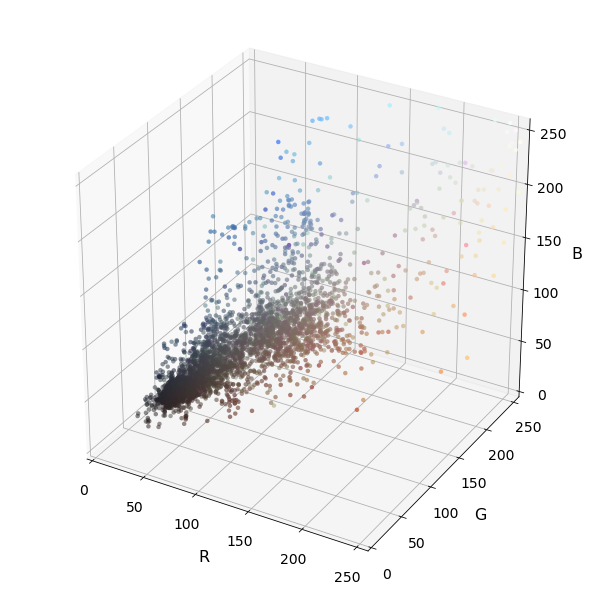

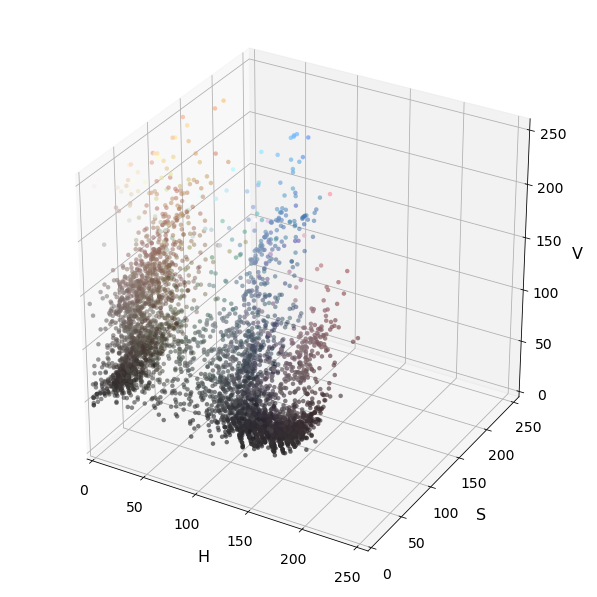

In [22]:
img = cv2.imread("../data/3.png")
plot_3d_image(img)

In [23]:
# Define a function that takes an image, a color space, 
# and a new image size
# and returns a feature vector
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    COLOR = eval("cv2.COLOR_BGR2{}".format(color_space))
    img = cv2.cvtColor(img, COLOR)
    
    # Use cv2.resize().ravel() to create the feature vector
    resized_img = cv2.resize(img, size)
    feature_vector = resized_img.ravel()
    
    # Return the feature vector
    return feature_vector

In [24]:
spatially_binned = bin_spatial(cv2.imread('../data/test_img.jpg'))

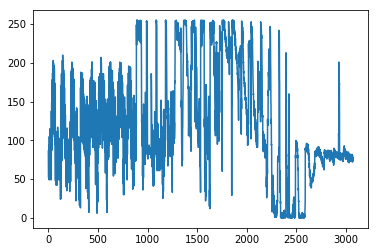

In [25]:
plt.plot(spatially_binned)
plt.show()

In [26]:
from skimage.feature import hog

In [27]:
hog?

In [28]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient=9, pix_per_cell=8, cell_per_block=2, vis=False, feature_vec=True):    
    features, hog_image = hog(
        img, 
        orientations=orient,
        pixels_per_cell=(pix_per_cell, pix_per_cell),
        cells_per_block=(cell_per_block, cell_per_block),
        block_norm='L2',
        visualise=True,
        feature_vector=True
    )
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        return({
            'features':features, 
            'image': hog_image
        })
    else:      
        # Use skimage.hog() to get features only
        return({
            'features':features
        })
    
orient = 9
pix_per_cell = 8
cell_per_block = 2
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [29]:
hog_obj = get_hog_features(gray, vis=True)

In [30]:
hog_obj

{'features': array([ 0.10610537,  0.03790032,  0.00960707, ...,  0.09153912,
         0.15463135,  0.27573912]),
 'image': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  3.41132811, ...,  0.28672485,
          0.        ,  0.        ],
        [ 0.        ,  2.66583157,  0.        , ...,  0.        ,
          0.06298639,  0.        ],
        ..., 
        [ 0.        ,  0.15031174,  0.        , ...,  0.        ,
          0.48629308,  0.        ],
        [ 0.        ,  0.        ,  0.1997788 , ...,  2.28630322,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])}

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

###### TODO ###########
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for img in imgs:
        # Read in each one by one
        image = cv2.imread(img)
        
        # apply color conversion if other than 'RGB'
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        # Apply bin_spatial() to get spatial color features
        spatial_bin_features = bin_spatial(image)
        
        # Apply color_hist() to get color histogram features
        hist_features = color_hist(image)
        
        hog_features = get_hog_features(gray)['features']    
        # Append the new feature vector to the features list
        feature_vector = np.concatenate((spatially_binned, hist_features, hog_features))
        
        features.append(feature_vector)
        
    # Return list of feature vectors
    return features

images = glob.glob('../data/vehicle_detection/*.jpeg')
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)
        
car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

In [37]:
if len(car_features) > 0:
    # Create an array

    # y stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        

    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))

In [33]:
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

In [34]:
from sklearn.cross_validation import train_test_split

/Users/amogh/workspace/jazz/code/courses/sdc/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
from sklearn.model_selection import train_test_split

In [38]:
rand_state = np.random.randint(0, 100)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, 
    y, 
    test_size=0.2, 
    random_state=rand_state
)

# Classifier

In [39]:
from sklearn.svm import LinearSVC
# Use a linear SVC (support vector classifier)
svc = LinearSVC()
# Train the SVC
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [40]:
print('Test Accuracy of SVC = ', svc.score(X_test, y_test))

Test Accuracy of SVC =  0.9625


In [41]:
X_test[0:10].reshape

<function ndarray.reshape>

In [42]:
print('My SVC predicts: ', svc.predict(X_test[0:10]))
print('For labels: ', y_test[0:10])

My SVC predicts:  [ 1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
For labels:  [ 1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]


# Sliding window implementation

In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('../data/bbox-example-image.jpg')

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    

In [48]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=(None, None), y_start_stop=(None, None), 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    # Compute the span of the region to be searched    
    # Compute the number of pixels per step in x/y
    # Compute the number of windows in x/y
    # Initialize a list to append window positions to
    
    x_stop = x_start_stop[1]
    x_search_subset = (x_start_stop[1] - x_start_stop[0])
    x_start = x_stop  - (int(x_search_subset/xy_window[0]) * xy_window[0])
    
    y_stop = y_start_stop[1]
    y_search_subset = (y_start_stop[1] - y_start_stop[0])    
    y_start = y_stop - (int(y_search_subset/xy_window[1]) * xy_window[0])
    
    window_list = []
    for j in range(y_stop, y_start, -1*int(xy_window[1]*xy_overlap[1])):
        for i in range(x_stop, x_start, -1*int(xy_window[0]*xy_overlap[0])):
            window_list.append(
                (
                    (i-xy_window[0], j-xy_window[1]), (i, j)
                )
            )
    return window_list

In [49]:
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

In [52]:
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: 
        feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True)['features'])      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)['features']
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

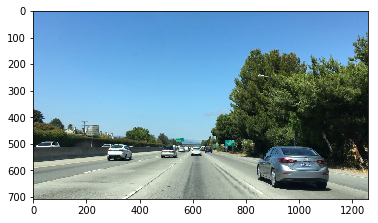

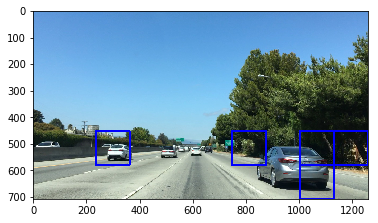

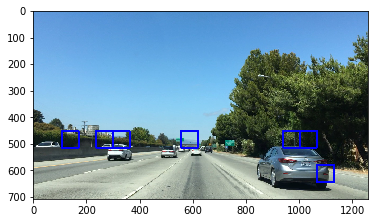

In [55]:


window_scale_sizes = [256, 128, 64]

for window_scale_size in window_scale_sizes:
    windows = slide_window(image, x_start_stop=(0, image.shape[1]), y_start_stop=(int(image.shape[0]*0.6), image.shape[0]), 
                        xy_window=(window_scale_size, window_scale_size), xy_overlap=(1, 1))
    
    car_windows = search_windows(image, windows, svc, X_scaler)
    
    window_img = draw_boxes(image, car_windows, color=(0, 0, 255), thick=6)                    
    plt.imshow(window_img)
    plt.show()